In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

Actions
up = 0
right = 1
down = 2
left = 3


In [10]:
#Bu fonksiyon e-greedy algoritması ile bir alınacak aksiyonun belirlenmesini sağlıyor
def next_action(row,col,e):
    roll = np.random.random()
    if roll <= e:
        action = np.random.randint(4)
        while (action == 0 and row == 0) or (action == 1 and col == 11) or(action == 2 and row == 3) or (action == 3 and col == 0):
            action = np.random.randint(4)
    else:
        action = np.argmax(Q_table[row,col])
        if (action == 0 and row == 0) or (action == 1 and col == 11) or(action == 2 and row == 3) or (action == 3 and col == 0):
            order = np.argsort(Q_table[row,col])
            for i in range(4):
                if order[2] == i:
                    action = i
                    break
            if (action == 0 and row == 0) or (action == 1 and col == 11) or(action == 2 and row == 3) or (action == 3 and col == 0):
                for j in range(4):
                    if order[1] == j:
                        action = j
                        break
            if (action == 0 and row == 0) or (action == 1 and col == 11) or(action == 2 and row == 3) or (action == 3 and col == 0):
                for m in range(4):
                    if order[0] == m:
                        action = m
                        break                                              
    return action

#Bu fonksiyon durumu güncelliyor ve eğer cliff bölgesine geldiyse oyunu sonlandırmak için bir kontrol değeri veriyor.
def take_action(row,col,action):
    cliff_check = False
    if (action == 0):
        new_row = row - 1
        new_col = col
    elif (action == 1):
        new_col = col + 1
        new_row = row
    elif (action == 2):
        new_row = row + 1
        new_col = col
    elif (action == 3):
        new_col = col - 1
        new_row = row
#uçuruma gelip gelmediğini test etmek için.        
    if (row == 3 and (1 <= col <= 11)):
        cliff_check = True
    return new_row,new_col,cliff_check

# Bulunan durumdaki Q değerini Q_learning için güncelliyor.
def update_Q(row,col,rewards,Q_table,gama,lr,next_row,next_col,action):
    Q_old = Q_table[row,col,action]
    max_action = next_action(next_row,next_col,-1)
    Q_new = Q_old + lr*(rewards[row,col] + gama*Q_table[next_row,next_col,max_action] - Q_old)
    return Q_new

# Bulunan durumdaki Q değerini SARSA_learning için güncelliyor.
def update_Q_Sarsa(row,col,rewards,Q_table,gama,lr,next_row,next_col,action,e):
    Q_old = Q_table[row,col,action]
    new_action = next_action(next_row,next_col,e)
    Q_new = Q_old + lr*(rewards[row,col] + gama*Q_table[next_row,next_col,new_action] - Q_old)
    return Q_new,new_action

#Grafikleri çizmek için
def plotting(xlabel,ylabel_q,ylabel_sarsa):
    plt.ylabel('Reward per episode')
    plt.xlabel('Episodes')
    plt.plot(xlabel,ylabel_q, label="line 1")
    plt.plot(xlabel,ylabel_sarsa, label= "line 2")
    plt.show()

        
def animation(last_game):      
    gridworld = np.zeros([4, 12])
# add cliff marked as -1
    gridworld[3, 1:11] = -100
    for i in range(0, 4):
        print('-------------------------------------------------')
        out = '| '
        for j in range(0, 12):
            if gridworld[i, j] == -100:
                inside = 'C'
            if gridworld[i, j] == 0:
                inside = ' '
            for m in last_game:
                if [i, j] == m:
                    inside = 'P'
                    break
            if (i, j) == (3,11):
                inside = 'F'
            out += inside + ' | '
        print(out)
    print('-------------------------------------------------')

In [11]:
def q_learning(Q_table,rewards,episode,e,gama,learning_rate,ylabel,xlabel,total_reward):
    mean_rewards = []
    last_state = []
    for i in range(episode):
#         print(f"Reward {total_reward}")
#         print(f"Episode {i}")
        row = 3
        col = 0
        total_reward = 0
        while True:
            if i == episode-1:
                last_state.append([row,col])
            if (row == 3) and (col == 11):
                break
            total_reward += rewards[row,col]
#             print(f"Row {row}")
#             print(f"Col {col} \n")
            action = next_action(row,col,e)
            next_row,next_col,cliff_check = take_action(row,col,action)
            Q_table[row,col,action] = update_Q(row,col,rewards,Q_table,gama,learning_rate,next_row,next_col,action)
            row = next_row
            col = next_col
            if cliff_check == True:
                break
#Tablolar ve grafikler için                
        ylabel.append(total_reward)
        mean_reward = np.mean(ylabel)
        mean_rewards.append(mean_reward)
#    print(Q_table)
#    plotting(Q_table,xlabel,mean_rewards)
    animation(last_state)
    print(last_state)
    return mean_rewards
    
def sarsa_learning(Q_table,rewards,episode,e,gama,learning_rate,ylabel,xlabel,total_reward):
    mean_rewards = []
    last_state = []
    for i in range(episode):
#         print(f"Reward {total_reward}")
#         print(f"Episode {i}")
        row = 3
        col = 0
        total_reward = 0
        action = next_action(row,col,e)
        while True:
            if i == episode-1:
                last_state.append([row,col])
            if (row == 3) and (col == 11):
                break
            total_reward += rewards[row,col]
#             print(f"Row {row}")
#             print(f"Col {col} \n")
            next_row,next_col,cliff_check = take_action(row,col,action)
            Q_table[row,col,action],action = update_Q_Sarsa(row,col,rewards,Q_table,gama,learning_rate,next_row,next_col,action,e)
            row = next_row
            col = next_col
            if cliff_check == True:
                break
#Tablolar ve grafikler için 
        ylabel.append(total_reward)
        mean_reward = np.mean(ylabel)
        mean_rewards.append(mean_reward)
#    print(Q_table)
    animation(last_state)
    return mean_rewards
#    plotting(Q_table,xlabel,mean_rewards)  


-------------------------------------------------
| P | P | P | P | P | P | P | P | P | P | P | P | 
-------------------------------------------------
| P | P |   |   |   |   |   |   |   |   |   | P | 
-------------------------------------------------
| P |   |   |   |   |   |   |   |   |   |   | P | 
-------------------------------------------------
| P | C | C | C | C | C | C | C | C | C | C | F | 
-------------------------------------------------
-------------------------------------------------
|   |   |   |   |   |   |   |   |   |   |   |   | 
-------------------------------------------------
|   |   |   |   |   |   |   |   |   |   |   |   | 
-------------------------------------------------
| P | P | P | P | P | P | P | P | P | P | P | P | 
-------------------------------------------------
| P | C | C | C | C | C | C | C | C | C | C | F | 
-------------------------------------------------
[[3, 0], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2,

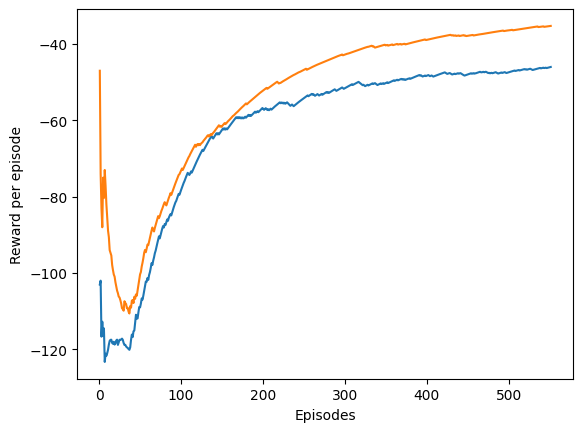

In [12]:
#initializations for Sarsa
Q_table = np.zeros((4,12,4))
rewards = np.full((4,12),-1)
episode = 550
rewards[3,1:11] = -100
rewards[3,11] = 0
e = 0.1
gama = 0.9
learning_rate = 0.40
xlabel = np.linspace(1,episode+1,num = episode)
total_reward = 0
ylabel_Sarsa = []

mean_rewards_sarsa = sarsa_learning(Q_table,rewards,episode,e,gama,learning_rate,ylabel_Sarsa,xlabel,total_reward)


#initializations for Q learning
Q_table = np.zeros((4,12,4))
ylabel_Q = []
total_reward = 0
mean_rewards_q = q_learning(Q_table,rewards,episode,e,gama,learning_rate,ylabel_Q,xlabel,total_reward)

plotting(xlabel,mean_rewards_q,mean_rewards_sarsa)